## DMRG

For the half filling case $n_i=2$, the dimension is $C_4^2=6$ for the local Hilbert space. A basis of the states on a single site can be chosen as: 
$$
\begin{aligned}
& |a\rangle=|12\rangle, \quad|b\rangle=|13\rangle, \quad|c\rangle=|14\rangle, \\
& |d\rangle=|23\rangle, \quad|e\rangle=|24\rangle, \quad|f\rangle=|34\rangle. \\
&
\end{aligned}
$$
where $|12\rangle=c_1^\dagger c_2^\dagger|0\rangle$. 

The 15 traceless $SU(4)$ spin generators can be written as 
$$
S_{\alpha\beta} = c_\alpha^\dagger c_\beta - \frac{1}{2} \delta_{\alpha\beta}
$$
where $\alpha,\beta=1,2,3,4$. Let us carry out the matrix representation of these generators under the basis above. 

The diagonal terms are $S_{\alpha\alpha} = c_\alpha^\dagger c_\alpha - \frac{1}{2}$. One should calculate a large amount of expectations like $\langle a | c_1^\dagger c_1 | a\rangle$. For every $\alpha$ there are $6\times 6=36$ entries await. Thus it is better to accelerate it with a code. 

In [102]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

def oprs_on_ket(oprs_original, ket):
    """
    Inputs: 
        1. oprs_original, list of strings, the operators in the middle
        2. ket, list of strings, the ket

    Outputs:
        1. coe, the coefficient, 1 or -1 or 0
        2. ket, list of strings or zero(integer), the result of application of operators
    """

    oprs = deepcopy(oprs_original)
    assert len(oprs) != 0 #there must be at least one operator inside list oprs
    coe = 1

    while len(oprs) != 0:
        opr = oprs[-1]

        if opr.endswith('d'): #creation operator
            opr = opr[:-1] #cut the 'd' in the end
            if any(opr in _ for _ in ket): #if opr is already in ket
                ket = 0
                return 0, ket #return (0,0)
            else: #opr is not in ket
                ket.insert(0,opr)
        else: #annihilation operator
            if any(opr in _ for _ in ket): 
                index = ket.index(opr) #index is the number of particles 'before' opr
                coe *= (-1)**index
                ket.remove(opr)
            else:
                ket = 0
                return 0, ket #return (0,0)
        oprs = oprs[:-1] #cut the operator in oprs after application
    return coe, ket

def get_ket_from_6states(n):
    if n == 1:
        return ['1','2']
    elif n == 2:
        return ['1','3']
    elif n == 3:
        return ['1','4']
    elif n == 4:
        return ['2','3']
    elif n == 5:
        return ['2','4']
    elif n == 6:
        return ['3','4']
    else:
        raise("Out of 6 states. ")

def S_representation_matrix(alpha, beta):
    if type(alpha) != int or type(beta) != int or alpha>4 or alpha<1 or beta>4 or beta<1:
        raise("Check your alpha and beta. They must be 1,2,3,4. ")
    S_mat = np.zeros((6,6))
    for left in range(1,7):
        bra = get_ket_from_6states(left)
        oprs = [str(alpha)+'d', str(beta)]
        oprs.insert(0, bra[0])
        oprs.insert(0, bra[1]) #put the annihilation operators in the front of oprs
        for right in range(1,7):
            ket = get_ket_from_6states(right)
            coe, ket = oprs_on_ket(oprs, ket)
            if ket == []:
                S_mat[left-1, right-1] = coe
            elif ket == 0:
                S_mat[left-1, right-1] = 0
            else:
                raise('something wrong')
    if alpha==beta:
        S_mat -= (1/2)*np.diag([1,1,1,1,1,1])
    return S_mat

In [103]:
#test of function 'oprs_on_ket'
operators = ['3','2','1d','1']
state = ['2','3']

oprs_on_ket(operators, state)

(0, 0)

In [104]:
for a in range(1,5):
    for b in range(1,5):
        print("S",a,b,"matrix is")
        print(S_representation_matrix(a,b))

S 1 1 matrix is
[[ 0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -0.5]]
S 1 2 matrix is
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
S 1 3 matrix is
[[ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
S 1 4 matrix is
[[ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
S 2 1 matrix is
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
S 2 2 matrix is
[[ 0.5  0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.5  0. 

### The Cartan sub-algebra

As we can see the 4 diagonal generators are: 

$$
S_{11}=\left(\begin{array}{cccccc}
0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & -0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & -0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & -0.5
\end{array}\right),\quad S_{22}=\left(\begin{array}{cccccc}
0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & -0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & -0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & -0.5
\end{array}\right),\quad S_{33}=\left(\begin{array}{cccccc}
-0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & -0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & -0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.5
\end{array}\right),\quad S_{44}=\left(\begin{array}{cccccc}
-0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & -0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & -0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.5
\end{array}\right). 
$$

It is obvious that only 3 out of 4 are linear independent, namely $S_{44}=-S_{11}-S_{22}-S_{33}$. The dimension of the Cartan sub-algebra of Lie algebra $\mathfrak{su}(4)$ is $4-1=3$, it is also the rank of Lie group $SU(4)$. So we can construct the Cartan sub-algebra by the first 3 diagonal generators. But LA.norm() of these 3 generators are not sqrt(2). In order to obtain the Cartan sub-algebra, we should perform the Schimidt orthogonalization first. 


In [105]:
import numpy.linalg as LA

def gram_schmidt(A):
    Q, _ = LA.qr(A)
    return Q

def schmidt_to_cartan_subalgebra(S1,S2,S3):
    A = np.array([S1.flatten(), S2.flatten(), S3.flatten()])
    Q = gram_schmidt(A.T).T

    B1 = Q[0].reshape(6, 6)
    B2 = Q[1].reshape(6, 6)
    B3 = Q[2].reshape(6, 6)

    C1 = B1 * np.sqrt(2 / np.trace(B1 @ B1.T))
    C2 = B2 * np.sqrt(2 / np.trace(B2 @ B2.T))
    C3 = B3 * np.sqrt(2 / np.trace(B3 @ B3.T))

    return C1, C2, C3

The function "schmidt_to_cartan_subalgebra" brings three unorthogonalized matrices into Gram-Schmidt orthogonalization process. 

In [106]:
C1, C2, C3 = schmidt_to_cartan_subalgebra(S_representation_matrix(1,1), S_representation_matrix(2,2), S_representation_matrix(3,3))

cc1 = np.diag([-1,-1,-1, 1, 1, 1])/np.sqrt(3)
cc2 = np.diag([-2, 1, 1,-1,-1, 2])/np.sqrt(6)
cc3 = np.diag([ 0,-1, 1,-1, 1, 0])/np.sqrt(2)

print('C1', C1, np.allclose(C1,cc1))
print('C2', C2, np.allclose(C2,cc2))
print('C3', C3, np.allclose(C3,cc3))

C1 [[-0.57735027 -0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.57735027 -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.57735027 -0.         -0.         -0.        ]
 [-0.         -0.         -0.          0.57735027 -0.         -0.        ]
 [-0.         -0.         -0.         -0.          0.57735027 -0.        ]
 [-0.         -0.         -0.         -0.         -0.          0.57735027]] True
C2 [[-0.81649658  0.         -0.         -0.         -0.         -0.        ]
 [-0.          0.40824829 -0.         -0.         -0.         -0.        ]
 [-0.         -0.          0.40824829 -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.40824829 -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.40824829 -0.        ]
 [-0.         -0.         -0.         -0.         -0.          0.81649658]] True
C3 [[ 5.25581098e-17 -3.14018492e-16  0.00000000e+00  0.00000000e+00
   0.00000000

### Symmetry of switching 4 fermions

As a validation to the result of generators, switching the order of 4 fermions does not change the Hamiltonian and the zero trace of generators. For all half occupied combinations of 4 fermions, we can arrange the order of 4 fermions to get $A_4^4 = 24$ possibilities. 

In [107]:
import itertools

def get_ket_from_6states_with_order(n, arrange_order):
    """
    Inputs:
        1. n, int, the 2-occupied states, 1 to 6 for a to f
        2. arrange_order, list of str, the arrange order of '1234'
        
    Output:
        1. ket, str, ordered 2-occupied states
    """
    
    if n == 1:
        return [arrange_order[0], arrange_order[1]]
    elif n == 2:
        return [arrange_order[0], arrange_order[2]]
    elif n == 3:
        return [arrange_order[0], arrange_order[3]]
    elif n == 4:
        return [arrange_order[1], arrange_order[2]]
    elif n == 5:
        return [arrange_order[1], arrange_order[3]]
    elif n == 6:
        return [arrange_order[2], arrange_order[3]]
    else:
        raise("Out of 6 states. ")
    
def arrange_four_fermions():
    chars = ['1', '2', '3', '4']
    permutations = itertools.permutations(chars)
    return [list(_) for _ in permutations]

def S_representation_matrix_with_order(alpha, beta, arrange_order):
    if type(alpha) != int or type(beta) != int or alpha>4 or alpha<1 or beta>4 or beta<1:
        raise("Check your alpha and beta. They must be 1,2,3,4. ")
    S_mat = np.zeros((6,6))
    for left in range(1,7):
        bra = get_ket_from_6states_with_order(left, arrange_order)
        oprs = [str(alpha)+'d', str(beta)]
        oprs.insert(0, bra[0])
        oprs.insert(0, bra[1])
        for right in range(1,7):
            ket = get_ket_from_6states_with_order(right, arrange_order)
            coe, ket = oprs_on_ket(oprs, ket)
            if ket == []:
                S_mat[left-1, right-1] = coe
            elif ket == 0:
                S_mat[left-1, right-1] = 0
            else:
                raise('something wrong')
    if alpha==beta:
        S_mat -= (1/2)*np.diag([1,1,1,1,1,1])
    return S_mat

all_four_fermion_arrange = arrange_four_fermions()

#zero trace must be kept for all permutations
for four_fermion in all_four_fermion_arrange:
    print("fermion order", four_fermion)
    for a in range(1,5):
        for b in range(1,5):
            print("trace of S",a,b, 'is', np.trace(S_representation_matrix_with_order(a,b, four_fermion)))
    print(" ")

fermion order ['1', '2', '3', '4']
trace of S 1 1 is 0.0
trace of S 1 2 is 0.0
trace of S 1 3 is 0.0
trace of S 1 4 is 0.0
trace of S 2 1 is 0.0
trace of S 2 2 is 0.0
trace of S 2 3 is 0.0
trace of S 2 4 is 0.0
trace of S 3 1 is 0.0
trace of S 3 2 is 0.0
trace of S 3 3 is 0.0
trace of S 3 4 is 0.0
trace of S 4 1 is 0.0
trace of S 4 2 is 0.0
trace of S 4 3 is 0.0
trace of S 4 4 is 0.0
 
fermion order ['1', '2', '4', '3']
trace of S 1 1 is 0.0
trace of S 1 2 is 0.0
trace of S 1 3 is 0.0
trace of S 1 4 is 0.0
trace of S 2 1 is 0.0
trace of S 2 2 is 0.0
trace of S 2 3 is 0.0
trace of S 2 4 is 0.0
trace of S 3 1 is 0.0
trace of S 3 2 is 0.0
trace of S 3 3 is 0.0
trace of S 3 4 is 0.0
trace of S 4 1 is 0.0
trace of S 4 2 is 0.0
trace of S 4 3 is 0.0
trace of S 4 4 is 0.0
 
fermion order ['1', '3', '2', '4']
trace of S 1 1 is 0.0
trace of S 1 2 is 0.0
trace of S 1 3 is 0.0
trace of S 1 4 is 0.0
trace of S 2 1 is 0.0
trace of S 2 2 is 0.0
trace of S 2 3 is 0.0
trace of S 2 4 is 0.0
trace of S 

In [108]:
list_of_generators = dict()

for alpha in range(1,5):
    for beta in range(1,5):
        list_of_generators[(alpha,beta)] = S_representation_matrix(alpha,beta)

Let us calculate the terms in Hamiltonian is $\mathrm{Tr}(S(i)S(j))=S^\alpha_{~\beta}(i)S^\beta_{~\alpha}(j)$. But with all 16 $S$ matrices. 

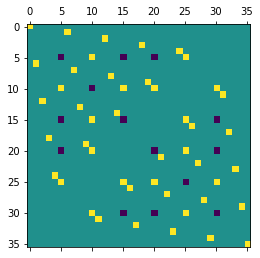

In [109]:
ham1 = np.zeros((36,36))
for a in range (1,5):
    for b in range(a,5):
        if a!=b:
            ham1 += np.kron( list_of_generators[(a,b)], list_of_generators[(b,a)] )
            ham1 += np.kron( list_of_generators[(b,a)], list_of_generators[(a,b)] )
        elif a == b:
            ham1 += np.kron( list_of_generators[(a,a)], list_of_generators[(a,a)] )

ham1 = ham1.reshape((6,6,6,6))

plt.matshow(ham1.reshape(36,36))
plt.show()

Using the orthogonalized diagonal matrices, do the calculation once again. The result should be the same. 

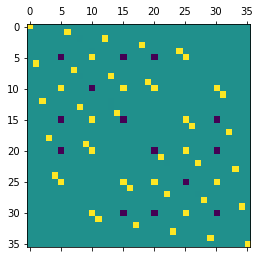

True

In [110]:
list_of_generators[(1,1)] = C1
list_of_generators[(2,2)] = C2
list_of_generators[(3,3)] = C3

ham11 = np.zeros((36,36))
for a in range (1,5):
    for b in range(a,5):
        if a!=b:
            ham11 += np.kron( list_of_generators[(a,b)], list_of_generators[(b,a)] )
            ham11 += np.kron( list_of_generators[(b,a)], list_of_generators[(a,b)] )
        elif a == b and a < 4: #don't get the last S involved
            ham11 += np.kron( list_of_generators[(a,a)], list_of_generators[(a,a)] )

ham11 = ham11.reshape((6,6,6,6))

plt.matshow(ham11.reshape(36,36))
plt.show()

np.allclose(ham1, ham11, atol=1e-8)

Now change the order of 4-fermion basis, this should give the same result. 

In [111]:
order = ['1','2','4','3']

C1, C2, C3 = schmidt_to_cartan_subalgebra(S_representation_matrix_with_order(1,1,order), S_representation_matrix_with_order(2,2,order), S_representation_matrix_with_order(3,3,order))

list_of_generators2 = dict()

for alpha in range(1,5):
    for beta in range(1,5):
        list_of_generators2[(alpha,beta)] = S_representation_matrix_with_order(alpha,beta,order)

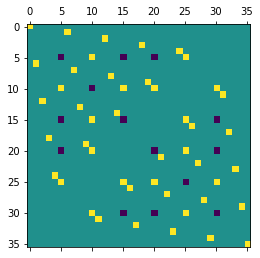

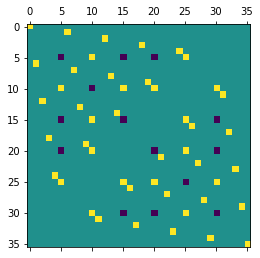

In [112]:
ham2 = np.zeros((36,36))
for a in range(1,5):
    for b in range(a,5):
        if a != b:
            ham2 += np.kron(list_of_generators2[(a,b)], list_of_generators2[(b,a)])
            ham2 += np.kron(list_of_generators2[(b,a)], list_of_generators2[(a,b)])
        elif a == b:
            ham2 += np.kron(list_of_generators2[(a,a)], list_of_generators2[(a,a)])

ham2 = ham2.reshape(6,6,6,6)

plt.matshow(ham1.reshape(36,36))
plt.show()

plt.matshow(ham2.reshape(36,36))
plt.show()

In [113]:
np.allclose(ham1,ham2, atol=1e-3)

True

Let us take a look at the non-zero entries in the Hamiltonian tensor. 

In [114]:
for a in range(6):
    for b in range(6):
        for c in range(6):
            for d in range(6):
                if abs(ham1[a,c,b,d]) > 1e-8:
                    print(a,b,c,d, ham1[a, c, b, d] )

0 0 0 0 1.0
0 0 5 5 -1.0
0 1 1 0 1.0
0 1 5 4 1.0
0 2 2 0 1.0
0 2 5 3 -1.0
0 3 3 0 1.0
0 3 5 2 -1.0
0 4 4 0 1.0
0 4 5 1 1.0
1 0 0 1 1.0
1 0 4 5 1.0
1 1 1 1 1.0
1 1 4 4 -1.0
1 2 2 1 1.0
1 2 4 3 1.0
1 3 3 1 1.0
1 3 4 2 1.0
1 5 4 0 1.0
1 5 5 1 1.0
2 0 0 2 1.0
2 0 3 5 -1.0
2 1 1 2 1.0
2 1 3 4 1.0
2 2 2 2 1.0
2 2 3 3 -1.0
2 4 3 1 1.0
2 4 4 2 1.0
2 5 3 0 -1.0
2 5 5 2 1.0
3 0 0 3 1.0
3 0 2 5 -1.0
3 1 1 3 1.0
3 1 2 4 1.0
3 3 2 2 -1.0
3 3 3 3 1.0
3 4 2 1 1.0
3 4 4 3 1.0
3 5 2 0 -1.0
3 5 5 3 1.0
4 0 0 4 1.0
4 0 1 5 1.0
4 2 1 3 1.0
4 2 2 4 1.0
4 3 1 2 1.0
4 3 3 4 1.0
4 4 1 1 -1.0
4 4 4 4 1.0
4 5 1 0 1.0
4 5 5 4 1.0
5 1 0 4 1.0
5 1 1 5 1.0
5 2 0 3 -1.0
5 2 2 5 1.0
5 3 0 2 -1.0
5 3 3 5 1.0
5 4 0 1 1.0
5 4 4 5 1.0
5 5 0 0 -1.0
5 5 5 5 1.0
